Chloe Quinto     
CPE 695     
HW 3    
I pledge my honor that I have abided by the Stevens Honor System - Chloe Quinto     

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt 
from sklearn import tree, metrics 

from keras.utils import to_categorical 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

from IPython.display import Image  
import pydotplus

Using TensorFlow backend.


### 1. read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Take a random 70% samples for training and the rest 30% for test.

In [2]:
df = pd.read_csv('./data/titanic.csv', header = 0)
df.head(10)

Unnamed: 0 pclass  survived                             name     sex  \
0           1    1st         1    Allen, Miss. Elisabeth Walton  female   
1           2    1st         1   Allison, Master. Hudson Trevor    male   
2           3    1st         0     Allison, Miss. Helen Loraine  female   
3           4    1st         0  Allison, Mr. Hudson Joshua Crei    male   
4           5    1st         0  Allison, Mrs. Hudson J C (Bessi  female   
5           6    1st         1              Anderson, Mr. Harry    male   
6           7    1st         1  Andrews, Miss. Kornelia Theodos  female   
7           8    1st         0           Andrews, Mr. Thomas Jr    male   
8           9    1st         1  Appleton, Mrs. Edward Dale (Cha  female   
9          10    1st         0          Artagaveytia, Mr. Ramon    male   

       age  sibsp  parch    ticket        fare    cabin     embarked boat  \
0  29.0000      0      0     24160  211.337494       B5  Southampton    2   
1   0.9167      1      2    113781  151.550003  C22 C26  Southampton   11   
2   2.0000      1      2    113781  151.550003  C22 C26  Southampton  NaN   
3  30.0000      1      2    113781  151.550003  C22 C26  Southampton  NaN   
4  25.0000      1      2    113781  151.550003  C22 C26  Southampton  NaN   
5  48.0000      0      0     19952   26.549999      E12  Southampton    3   
6  63.0000      1      0     13502   77.958298       D7  Southampton   10   
7  39.0000      0      0    112050    0.000000      A36  Southampton  NaN   
8  53.0000      2      0     11769   51.479198     C101  Southampton    D   
9  71.0000      0      0  PC 17609   49.504200      NaN    Cherbourg  NaN   

    body                        home.dest  
0    NaN                     St Louis, MO  
1    NaN  Montreal, PQ / Chesterville, ON  
2    NaN  Montreal, PQ / Chesterville, ON  
3  135.0  Montreal, PQ / Chesterville, ON  
4    NaN  Montreal, PQ / Chesterville, ON  
5    NaN                     New York, NY  
6    NaN                       Hudson, NY  
7    NaN                      Belfast, NI  
8    NaN              Bayside, Queens, NY  
9   22.0              Montevideo, Uruguay

In [3]:
# Let's look at a specific one
df.iloc[153]

Unnamed: 0                               154
pclass                                   1st
survived                                   1
name          Hays, Miss. Margaret Bechstein
sex                                   female
age                                       24
sibsp                                      0
parch                                      0
ticket                                 11767
fare                                 83.1583
cabin                                    C54
embarked                           Cherbourg
boat                                       7
body                                     NaN
home.dest                       New York, NY
Name: 153, dtype: object

In [4]:
df['survived'] = df["survived"].astype(int)

In [5]:
y = df["survived"]

feature_columns = ['pclass', "sex", "age", "sibsp"]
x = df[feature_columns].apply(LabelEncoder().fit_transform) 

Understanding LabelEcoder: 

For Passenger Class Labels

| new label  | pclass  |
|---|---|
| 0  |  1st |
|  1 |  2nd  |
|  2 |  3rd |

For Sex Labels 


| new label  | sex  |
|---|---|
| 0  |  male |
|  1 |  female  |


In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state=None)

In [7]:
xtrain

pclass  sex  age  sibsp
319        0    0   47      0
1218       2    1   45      0
1076       2    0  233      0
679        2    0   15      1
1167       2    1  321      0
...      ...  ...  ...    ...
1150       2    1  305      0
878        2    0   38      1
318        0    1  192      0
654        2    1   29      0
1143       2    1   13      4

[916 rows x 4 columns]

As a note on random_state: 
    if None, the random number generate is the Random State instance used by np.random

Let's look at the shape of our data 

In [8]:
print("xtrain shape: ", xtrain.shape)
print("xtest shape: ", xtest.shape)
print('\n')
print("ytrain shape: ", ytrain.shape)
print("ytest shape: ", ytest.shape)

xtrain shape:  (916, 4)
xtest shape:  (393, 4)


ytrain shape:  (916,)
ytest shape:  (393,)


### 2. Fit a decision tree model using independent variables 'pclass + sex + age + sibsp' and depndent variable 'survived'. Plot the full tree. Male sure 'survived' is a qualitiative variable taking in 1(yes) or 0 (no) into your code 

In [9]:
# Decision Tree Classifier Object 
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifier 
clf = clf.fit(xtrain, ytrain)

# Predict the response for test dataset
y_pred = clf.predict(xtest)

In [10]:
# Please uncomment to visualize this tree: 

# !pip install graphviz
# !pip install pydotplus 

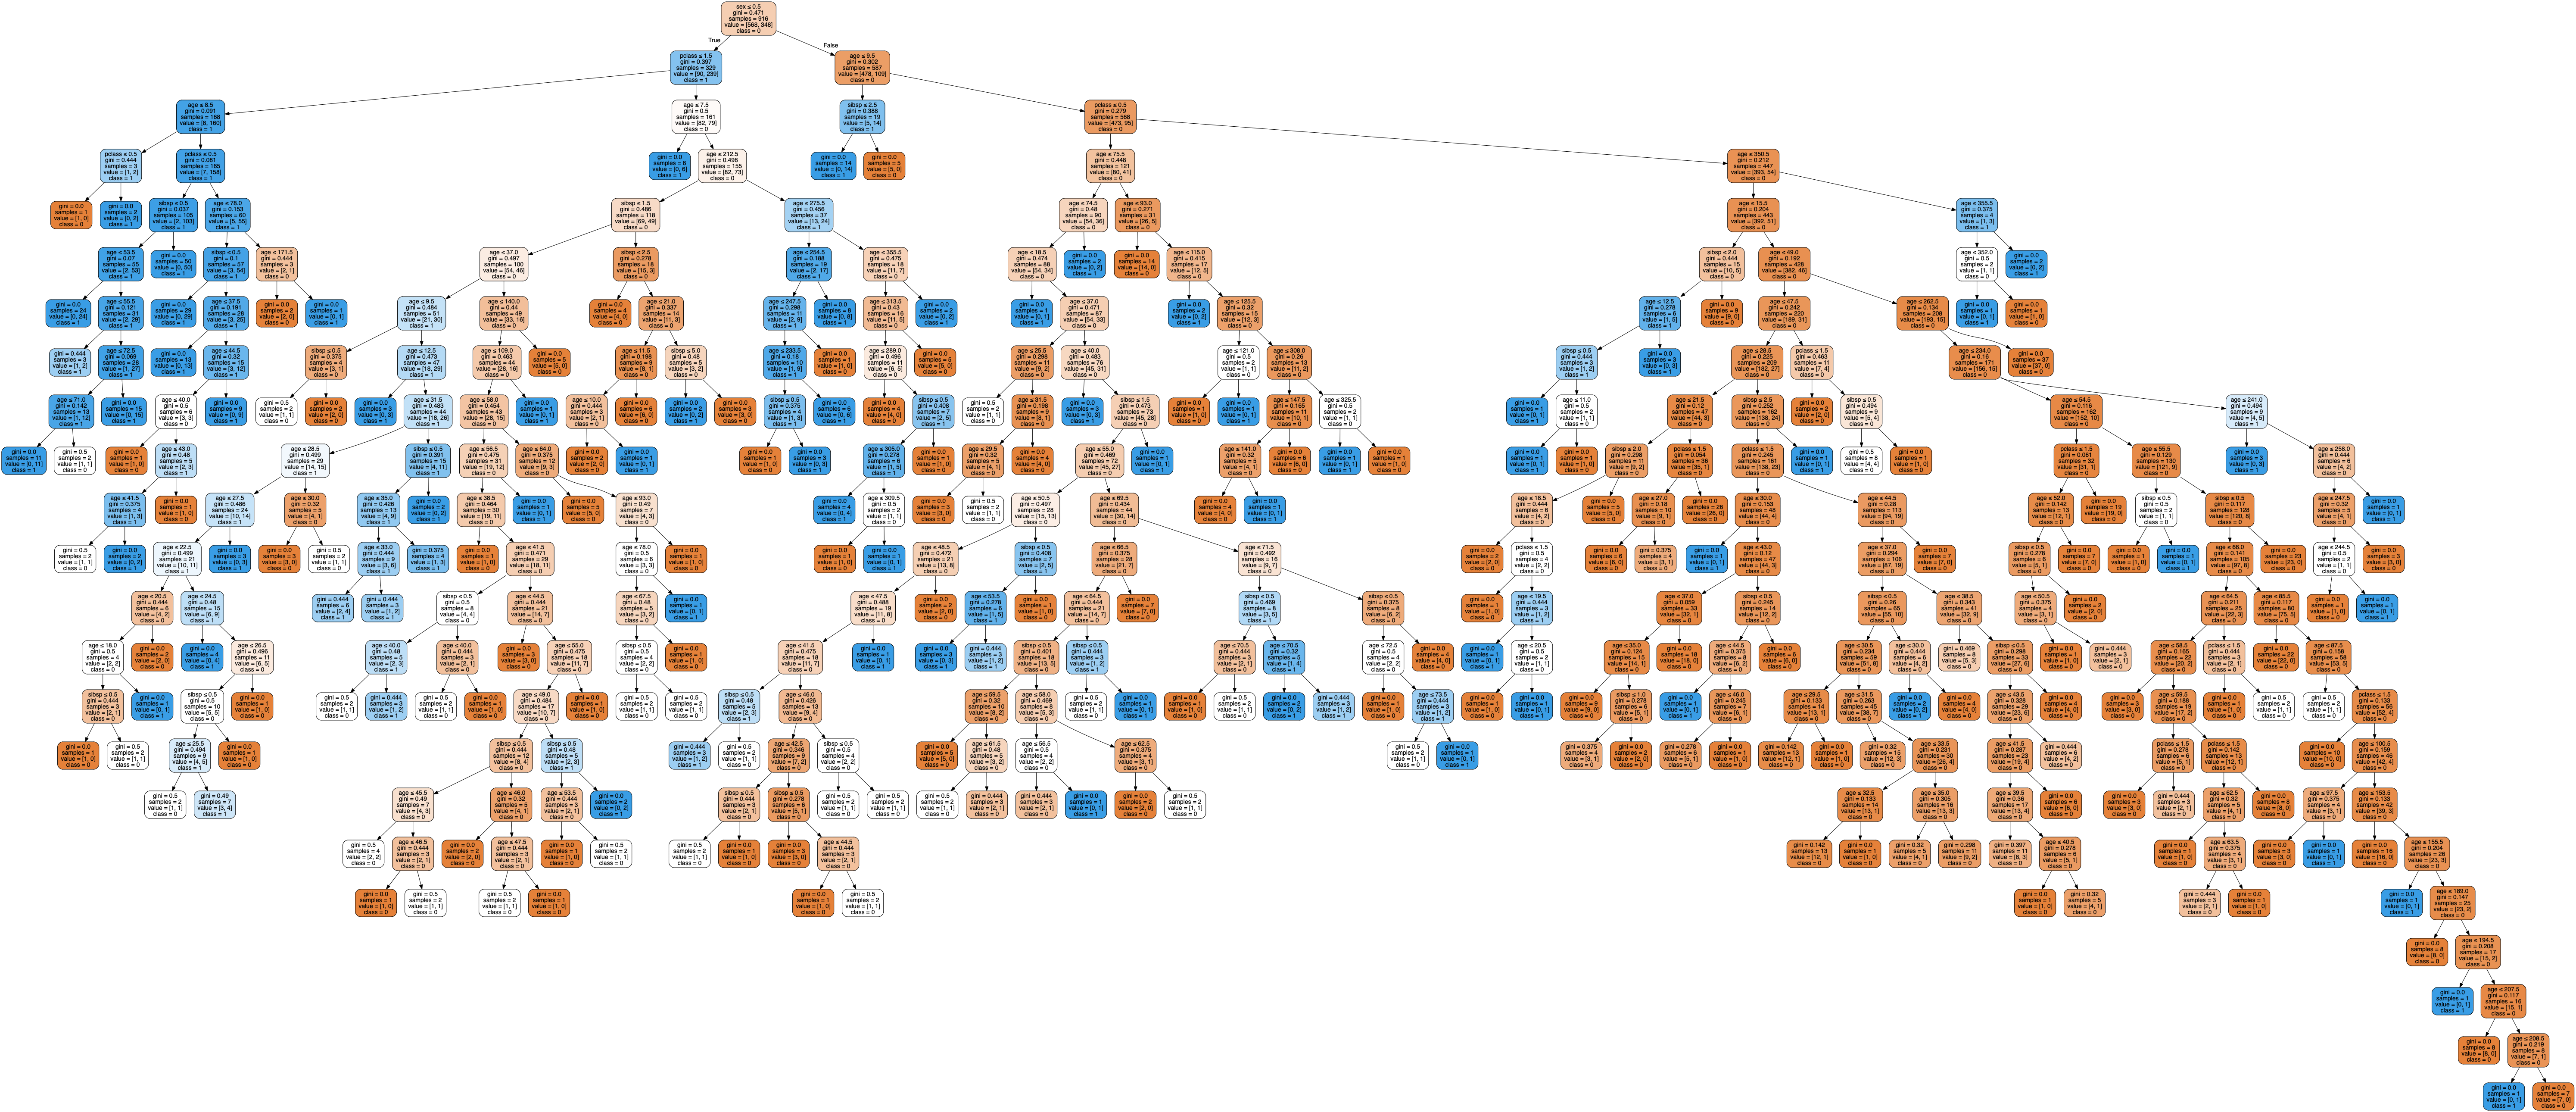

In [11]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('./images/FullDecisionTree.png')
Image(graph.create_png())

### 3. print out the performance measures of the full model: in-sample and out-of-sample accuracy 
- in-sample percent survivors correctly predicted(on training set)
- in-sample percent fatalities correctly predicted (on training set)
- out-of-sample percent survivors correctly predicted (on test set) 
- out-of-sample percent fatalities correctly predicted (on test set) 

In [12]:
##### in sample

print("In-Sample")
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xtrain, ytrain)
predictions  = clf.predict(xtrain)

# print(type(ytrain))
# print(type(predictions))

in_matrix = confusion_matrix(ytrain, predictions)
print(in_matrix)

inSampleSurvivors = in_matrix[1][1]/(in_matrix[1][1] + in_matrix[0][1]) 
inSampleFatalities = in_matrix[0][0]/(in_matrix[0][0] + in_matrix[1][0]) 

print("In-sample survivors on training: ", inSampleSurvivors*100)
print("In-sample fatalities on training: ", inSampleFatalities*100)


print("\n--------\n")

##### out of sample
print("Out-of-Sample")
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xtrain, ytrain)
predictions  = clf.predict(xtest)

out_matrix = confusion_matrix(ytest, predictions)
print(out_matrix)


outSampleSurvivors = out_matrix[1][1]/(out_matrix[1][1] + out_matrix[0][1]) 
outSampleFatalities = out_matrix[0][0]/(out_matrix[0][0] + out_matrix[1][0]) 

print("Out-of-sample survivors on testing: ", outSampleSurvivors*100)
print("Out-of-sample fatalities on testing: ", outSampleFatalities*100)


In-Sample
[[556  12]
 [ 58 290]]
In-sample survivors on training:  96.02649006622516
In-sample fatalities on training:  90.55374592833876

--------

Out-of-Sample
[[208  33]
 [ 59  93]]
Out-of-sample survivors on testing:  73.80952380952381
Out-of-sample fatalities on testing:  77.90262172284645


### 4. Use cross-validation to find the best parameter to prune the tree. You should be able to plot a graph with the "tree size" as the x-axis and "number of misclassifications" on the Y-axis. Find the minimum number of classifications and choose the corresponding tree size to prune the tree. 

In [13]:
rates = []
depth = []
for i in range(3,7): 
    
    clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = i)

    clf = clf.fit(xtrain, ytrain)

    y_pred = clf.predict(xtest)

    confusion_matrix = metrics.confusion_matrix(ytest, y_pred)

    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]  
    FN = confusion_matrix[1, 0]  

    misclassification_rate = (FP + FN) / float(TP + TN + FP + FN)
    depth.append(i)
    rates.append(misclassification_rate)

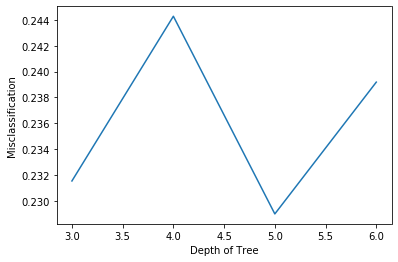

In [14]:
plt.plot(depth, rates)
plt.xlabel("Depth of Tree")
plt.ylabel("Misclassification")
plt.show()

In [15]:
parameters = {'max_depth':range(3,6)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=xtrain, y=ytrain)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.8067890235210264 {'max_depth': 5}


In [16]:
best_depth = clf.best_params_["max_depth"]

In [17]:
print("Best Max Depth is: ", best_depth)

Best Max Depth is:  5


### 5. Prune the tree with the optimal tree size. Plot the pruned tree. 

In [18]:
# Decision Tree Classifier Object 
clf = tree.DecisionTreeClassifier(max_depth = best_depth)

# Train Decision Tree Classifier 
clf = clf.fit(xtrain, ytrain)

# Predict the response for test dataset
y_pred = clf.predict(xtest)

print(best_depth)

5


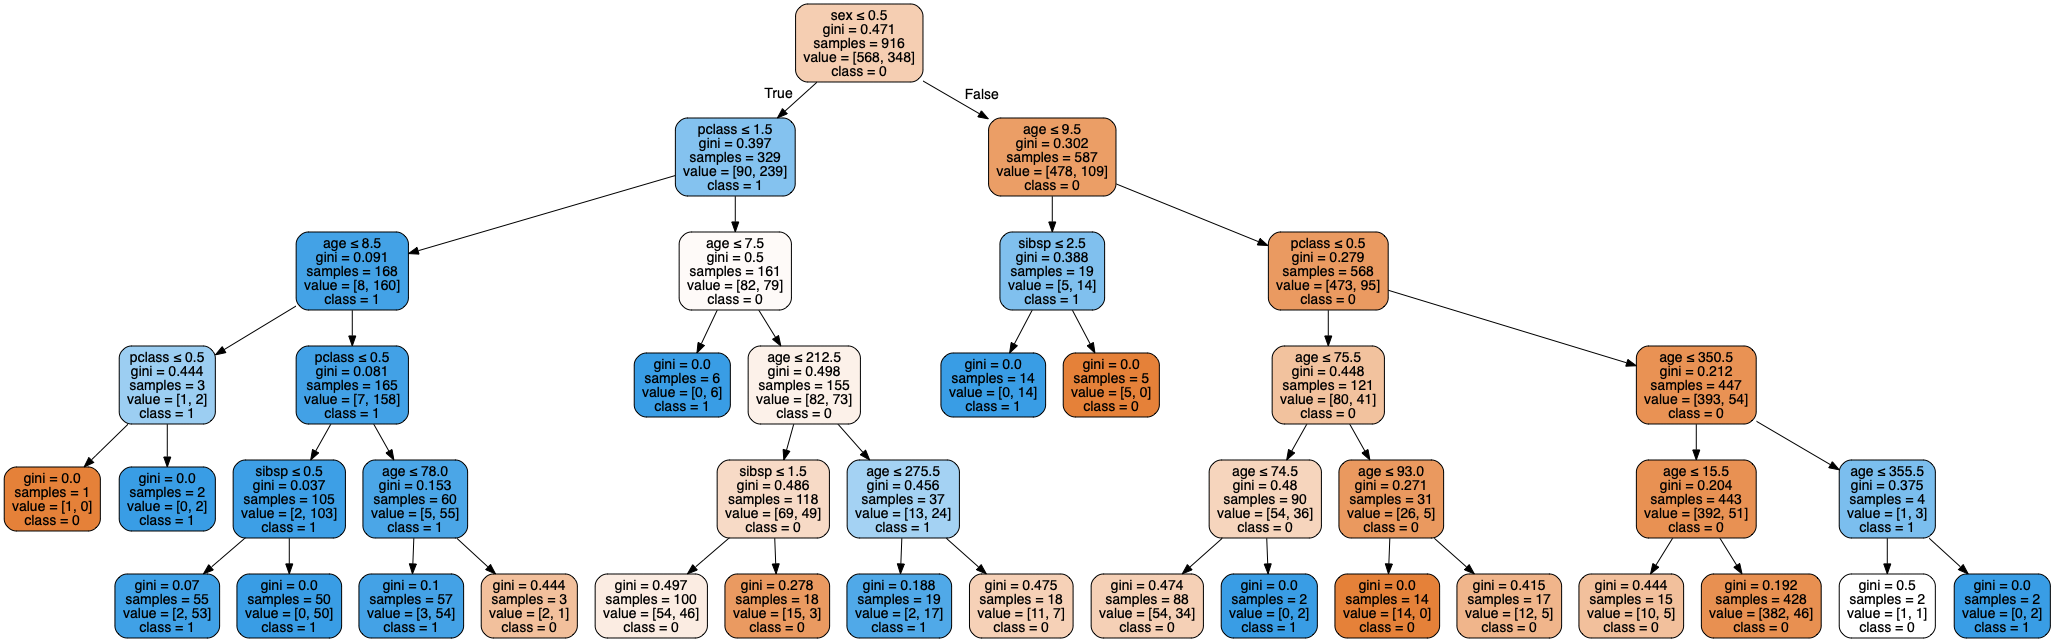

In [19]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('./images/PrunedDecisionTree.png')
Image(graph.create_png())

### 6. For the final pruned tree, report its in-sample and out of sample-accuracy defined as: 
- in-sample percent survivors correctly predicted(on training set)
- in-sample percent fatalities correctly predicted (on training set)
- out-of-sample percent survivors correctly predicted (on test set) 
- out-of-sample percent fatalities correctly predicted (on test set) 

In [20]:
# Since this is our second time using confusion_matrix, we have to rebind it back to our function: 

from sklearn.metrics import confusion_matrix

print("In-Sample")
clf = tree.DecisionTreeClassifier(max_depth = best_depth)
clf = clf.fit(xtrain, ytrain)
pred  = clf.predict(xtrain)

in_matrix = confusion_matrix(ytrain, pred)
print(in_matrix)

inSampleSurvivors = in_matrix[1][1]/(in_matrix[1][1] + in_matrix[0][1]) 
inSampleFatalities = in_matrix[0][0]/(in_matrix[0][0] + in_matrix[1][0]) 

print("In-sample survivors on training: ", inSampleSurvivors*100)
print("In-sample fatalities on training: ", inSampleFatalities*100)


print("\n--------\n")

##### out of sample
print("Out-of-Sample")
clf = tree.DecisionTreeClassifier(max_depth = best_depth)
clf = clf.fit(xtrain, ytrain)
predictions  = clf.predict(xtest)

out_matrix = confusion_matrix(ytest, predictions)
print(out_matrix)


outSampleSurvivors = out_matrix[1][1]/(out_matrix[1][1] + out_matrix[0][1]) 
outSampleFatalities = out_matrix[0][0]/(out_matrix[0][0] + out_matrix[1][0]) 

print("Out-of-sample survivors on testing: ", outSampleSurvivors*100)
print("Out-of-sample fatalities on testing: ", outSampleFatalities*100)


In-Sample
[[561   7]
 [148 200]]
In-sample survivors on training:  96.61835748792271
In-sample fatalities on training:  79.12552891396332

--------

Out-of-Sample
[[228  13]
 [ 77  75]]
Out-of-sample survivors on testing:  85.22727272727273
Out-of-sample fatalities on testing:  74.75409836065575


Our out-of-sample is a lot better with the pruned tree than the full tree. 